## Load Dataset 

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
# Load the dataset
file_path_latest = 'combined_data_2021_2022_2023.csv'
df_latest = pd.read_csv(file_path_latest)


## Top 20 Adverse Events

This analyzes the dataset to identify the most frequent adverse events and their significance. It calculates the total number of reports and generates a table that highlights event keywords, the number of associated reports, their occurrence frequencies, and their proportional representation as a percentage of the total reports. This analysis provides a concise and insightful overview of the distribution of adverse events, helping to pinpoint critical trends and their relative impact within the dataset.

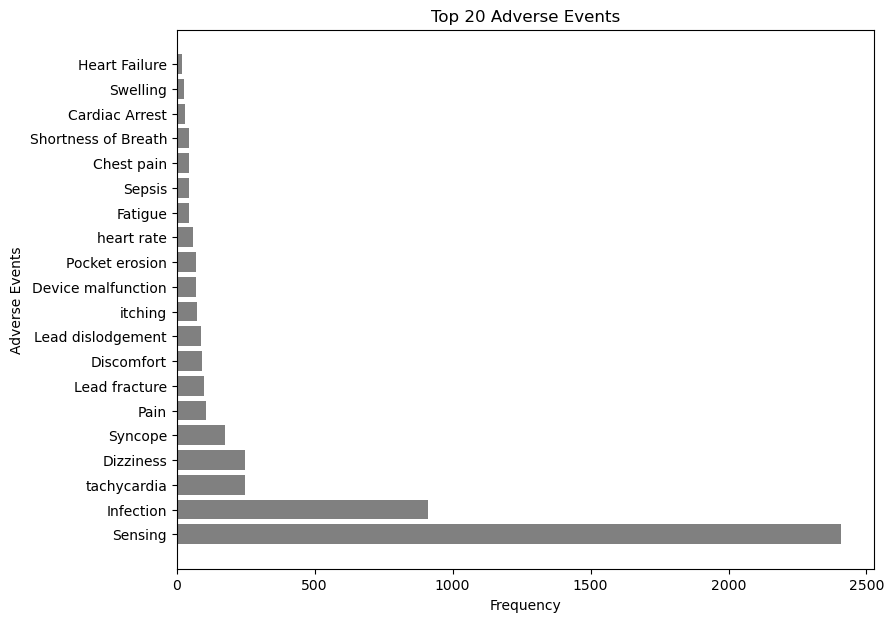

In [6]:
# Define adverse event keywords 
updated_adverse_event_keywords = [
    'Pain', 'bowel problem', 'Device Problem', 'Dizziness', 'Shortness of Breath', 'implant failure',
    'sexual problem', 'dyspareunia', 'chronic inflammation',
    'incontinence', 'recurrence','prolapse recurrence','tachycardia','Sensing',
    'Infection', 'Dyspareunia', 'Urinary problem','Chronic Inflammation','heart rate','Urinary problem',
       
    'Mental Stress', 'Chronic Inflammation', 'Incontinence recurrence', 'Nausea', 'Prolapse Recurrence',
        'Swelling', 'Bleeding', 'Discomfort', 'Sleeping Issue', 'Constipation', 'Diarrhea',
         'Allergic reaction', 'Lead dislodgement', 'Infection at the implantation site', 'Pocket erosion',
        'Lead fracture', 'Myocardial perforation', 'Arrhythmias', 'Device malfunction', 'Dyspareunia',
        'Twiddler’s syndrome', 'itching',

         'Chest pain', 'Dizziness', 'Syncope', 'Migration', 'Arthritis',
        'Fatigue', 'Arm pain', 'Shoulder pain', 'Device migration', 'Device recall', 
        'Systemic infection', 'Erosion of the pacemaker pocket',  'Sepsis','Anemia', 'Arthritis', 'Cardiac Arrest',  'Heart Failure'

]
# Function to find adverse events in the text
def find_adverse_events(text):
    found_events = []
    for keyword in updated_adverse_event_keywords:
        if keyword.lower() in text.lower():
            found_events.append(keyword)
    return found_events

# Apply the function to find adverse events
df_latest['ADVERSE_EVENTS'] = df_latest['FOI_TEXT'].apply(find_adverse_events)

# Analyze and present results
# Count the frequency of each type of adverse event
all_adverse_events = [event for events in df_latest['ADVERSE_EVENTS'] for event in events]
adverse_event_counts = Counter(all_adverse_events)

# Print the most common adverse events
most_common_adverse_events = adverse_event_counts.most_common(20)

# Create a bar chart of the top 20 adverse events
top_adverse_events = dict(most_common_adverse_events)

# Plotting the top 20 adverse events with gray color on a horizontal bar plot
plt.figure(figsize=(9, 7))
plt.barh(list(top_adverse_events.keys()), list(top_adverse_events.values()), color='gray')
plt.xlabel('Frequency')
plt.ylabel('Adverse Events')
plt.title('Top 20 Adverse Events')
plt.show()

## Adverse events with keywords

This defines a comprehensive mapping of adverse events to their associated keywords, capturing various terminologies and expressions that describe each event. It organizes the data into a structured format, creating a table that links adverse events like pain, device malfunction, and cardiac arrest to relevant keywords such as "ache," "malfunction," and "heart function." The table is saved as a CSV file for ease of reference and further analysis, providing a valuable resource for identifying and categorizing adverse events in text data.

In [8]:
# Define the adverse events and their associated keywords
adverse_events_data = {
    'Adverse Event': [ 
        'Pain', 'Bowel Problem', 'Device Problem', 'Sexual problem/ Dyspareunia',  'Urinary problem',
        'Mental Stress',  'Nausea', 'Prolapse Recurrence',
        'Swelling', 'Bleeding', 'Discomfort', 'Sleeping Issue', 'Constipation', 'Diarrhea',
         'Allergic reaction','Sepsis', 'Arthritis','Cardiac Arrest',  'Heart Failure','itiching','heart rate','sensing','infection'
    ],
    'Keywords': [
        'Hurt, Painful, Ache, Suffering, intense/ severe pain, misery',
        'Bowel obstruction/disorder/bloating, stomach cramps, gastrointestinal/ digestive issues',
        'Malfunction, implant failure',
        'Intercourse difficulty, sexual dysfunction, vaginal dryness, sexual dissatisfaction/ pleasure, intimacy issue',
        'Urine leakage, urine obstruction, urine urgency',
        'Anxiety, depression, distress, strain, tension, worried, fatigue, restless, nervous',
        'Vomiting, puke, throw up',
        'Prolapse relapse, prolapse reoccurrence',
        'Swollen, puff, redness, bulge, skin rash',
        'Blood loss, haemorrhage, bleed out',
        'Unease, irritation, soreness, discontent, breathing issue',
        'Insomnia, sleeplessness, sleep disorder/ difficulties',
        'Defecation problem, difficulty passing stool',
        'Runny stools, loose motions',
        'Allergy, rashes, itchy, skin reactions, hives',
        'Blood infection, severe response, organ failure, septic shock, bloodstream',
        'Joint pain, swelling, stiffness, inflammation, reduced mobility',
        'Sudden stop, heart function, emergency, collapse, resuscitation',
        'Heart inefficiency, shortness of breath, fluid retention, fatigue, swelling',
'pruritus, scratch, skin rash, hives, dermatitis, skin inflammation, eczema, urticaria',
        'heartbeat, pulse, heart rhythm, tachycardia, bradycardia, palpitations, irregular heartbeat, arrhythmia, heart rate variability, cardiovascular',
        'noise,communicating,disconnected,oversensing,threshold,noisy,undersensed,loss of capture',
        'infection,redness,bacteria,resuscitation'
    ]
}
# Create a DataFrame for the table
adverse_events_df = pd.DataFrame(adverse_events_data)

# Save the DataFrame to a CSV file
file_path = 'adverse_events_keywords.csv'
adverse_events_df.to_csv(file_path, index=False)

# Display the table
adverse_events_df

,Adverse Event,Keywords
0,Pain,"Hurt, Painful, Ache, Suffering, intense/ sever..."
1,Bowel Problem,"Bowel obstruction/disorder/bloating, stomach c..."
2,Device Problem,"Malfunction, implant failure"
3,Sexual problem/ Dyspareunia,"Intercourse difficulty, sexual dysfunction, va..."
4,Urinary problem,"Urine leakage, urine obstruction, urine urgency"
5,Mental Stress,"Anxiety, depression, distress, strain, tension..."
6,Nausea,"Vomiting, puke, throw up"
7,Prolapse Recurrence,"Prolapse relapse, prolapse reoccurrence"
8,Swelling,"Swollen, puff, redness, bulge, skin rash"
9,Bleeding,"Blood loss, haemorrhage, bleed out"


## Frequency Reports

This visualizes the frequency and percentage representation of the most common adverse events in the dataset. It computes the total number of reports and prepares a table that includes the event keywords, the number of associated reports, their frequencies, and their proportional representation as a percentage of the total reports. This table provides a clear summary of the distribution and significance of top adverse events, aiding in identifying key trends and patterns.

In [10]:
# Calculate the total number of reports
total_reports = df_latest.shape[0]

# Prepare data for the table
table_data = {
    'Keywords': [],
    'No. of Reports': [],
    'Frequency': [],
    'Report (%)': []
}

for event, count in most_common_adverse_events:
    table_data['Keywords'].append(event)
    table_data['No. of Reports'].append(count)
    table_data['Frequency'].append(count)
    table_data['Report (%)'].append((count / total_reports) * 100)

# Create a DataFrame for the table
table_df = pd.DataFrame(table_data)

# Display the table
table_df

,Keywords,No. of Reports,Frequency,Report (%)
0,Sensing,2408,2408,12.075018
1,Infection,910,910,4.563233
2,tachycardia,249,249,1.248621
3,Dizziness,248,248,1.243606
4,Syncope,175,175,0.877545
5,Pain,105,105,0.526527
6,Lead fracture,97,97,0.486411
7,Discomfort,92,92,0.461338
8,Lead dislodgement,87,87,0.436265
9,itching,74,74,0.371076


## Frequency Plot for 3 Years

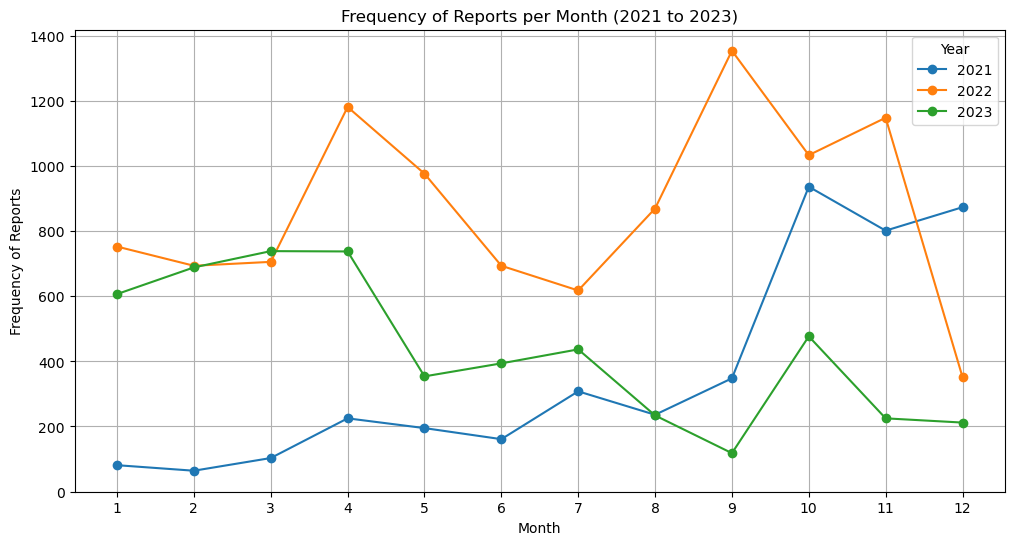

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE_RECEIVED' to datetime
df_latest['DATE_RECEIVED'] = pd.to_datetime(df_latest['DATE_RECEIVED'], errors='coerce')

# Extract year and month from 'DATE_RECEIVED'
df_latest['Year'] = df_latest['DATE_RECEIVED'].dt.year
df_latest['Month'] = df_latest['DATE_RECEIVED'].dt.month

# Filter data for the years 2021 to 2023
df_filtered = df_latest[(df_latest['Year'] >= 2021) & (df_latest['Year'] <= 2023)]

# Group by year and month to get the frequency of reports
reports_per_year_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Frequency')

# Plot the frequency of reports per year as a line graph
plt.figure(figsize=(12, 6))
months = range(1, 13)

for year in reports_per_year_month['Year'].unique():
    monthly_data = reports_per_year_month[reports_per_year_month['Year'] == year]
    plt.plot(monthly_data['Month'], monthly_data['Frequency'], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Frequency of Reports')
plt.title('Frequency of Reports per Month (2021 to 2023)')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(months)
plt.show()


## Adverse events for top 5 Device Models


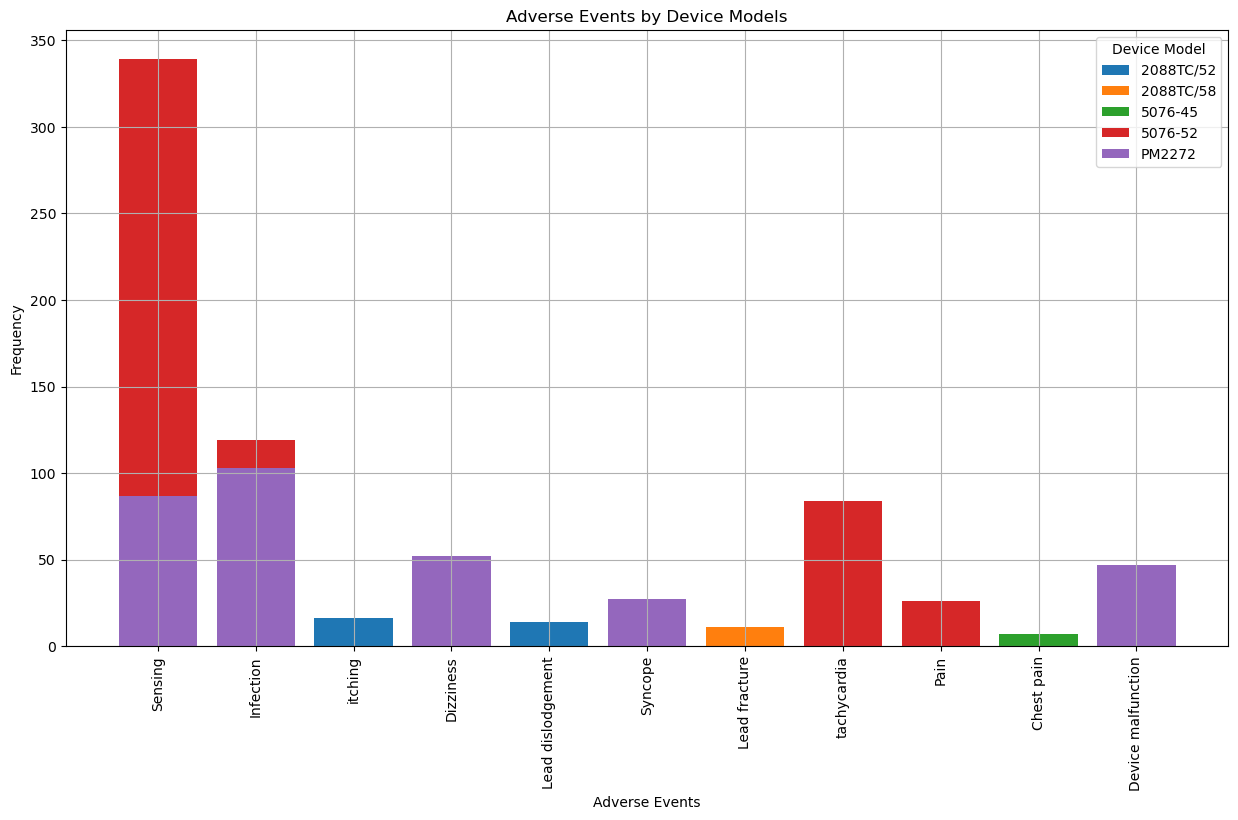

In [14]:
# Extracting relevant columns
device_model_events = df_latest[['MODEL_NUMBER', 'ADVERSE_EVENTS']]

# Exploding the 'ADVERSE_EVENTS' list to separate rows for each event
device_model_events = device_model_events.explode('ADVERSE_EVENTS')

# Grouping by device model and adverse event to get the frequency of each event per device model
device_model_event_counts = device_model_events.groupby(['MODEL_NUMBER', 'ADVERSE_EVENTS']).size().reset_index(name='Frequency')

# Summing frequencies for each device model to get overall adverse events count
device_model_event_totals = device_model_event_counts.groupby('MODEL_NUMBER')['Frequency'].sum().reset_index()

# Sorting the top device models by the number of adverse events
top_device_models = device_model_event_totals.sort_values(by='Frequency', ascending=False).head(5)

# Merging to get adverse events for top device models
top_device_model_events = device_model_event_counts[device_model_event_counts['MODEL_NUMBER'].isin(top_device_models['MODEL_NUMBER'])]

# Plotting adverse events by device model
plt.figure(figsize=(15, 8))

for model in top_device_model_events['MODEL_NUMBER'].unique():
    model_data = top_device_model_events[top_device_model_events['MODEL_NUMBER'] == model]
    top_events = model_data.sort_values(by='Frequency', ascending=False).head(5)
    plt.bar(top_events['ADVERSE_EVENTS'], top_events['Frequency'], label=model)

plt.xlabel('Adverse Events')
plt.ylabel('Frequency')
plt.title('Adverse Events by Device Models')
plt.legend(title='Device Model')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Distribution Report for adverse events

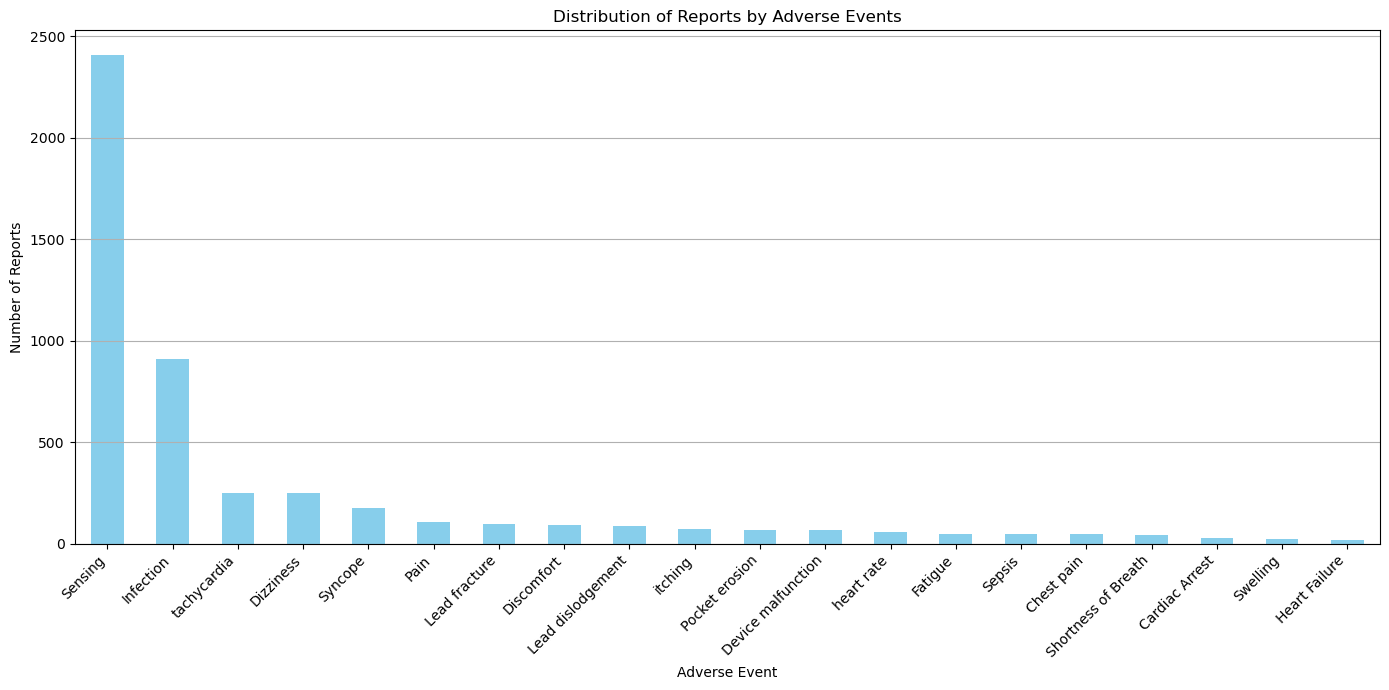

In [16]:
# Distribution of adverse events
df_latest['ADVERSE_EVENTS'] = df_latest['FOI_TEXT'].apply(find_adverse_events)
df_events = df_latest.explode('ADVERSE_EVENTS')
adverse_event_counts = df_events['ADVERSE_EVENTS'].value_counts().head(20)

# Plot the distribution of the top 20 adverse events
plt.figure(figsize=(14, 7))
adverse_event_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reports by Adverse Events')
plt.xlabel('Adverse Event')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Word cloud

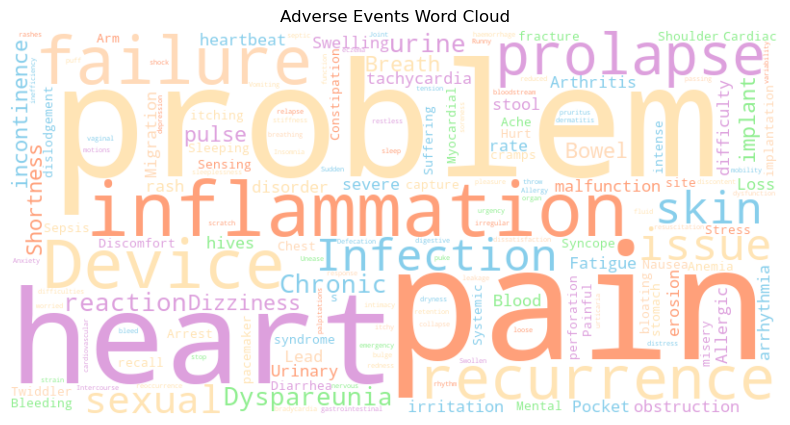

In [18]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
# List of adverse events and keywords provided by you
adverse_events_keywords = [
    'Pain', 'Bowel Problem', 'Device Problem', 'Dizziness', 'Shortness of Breath', 'implant failure',
    'sexual problem', 'dyspareunia', 'chronic inflammation','pulse',
    'incontinence', 'recurrence','prolapse recurrence','tachycardia','Sensing',
    'Infection', 'Dyspareunia', 'Urinary problem','Chronic Inflammation','heart rate','Urinary problem',
    'Mental Stress', 'Chronic Inflammation', 'Incontinence recurrence', 'Nausea', 'Prolapse Recurrence',
    'Swelling', 'Bleeding', 'Discomfort', 'Sleeping Issue', 'Constipation', 'Diarrhea',
    'Allergic reaction', 'Lead dislodgement', 'Infection at the implantation site', 'Pocket erosion',
    'Lead fracture', 'Myocardial perforation', 'Arrhythmias', 'Device malfunction', 'Dyspareunia',
    'Twiddler’s syndrome', 'itching', 'Chest pain', 'Dizziness', 'Syncope', 'Migration', 'Arthritis',
    'Fatigue', 'Arm pain', 'Shoulder pain', 'Device migration', 'Device recall', 'Loss of capture', 
    'Systemic infection', 'Erosion of the pacemaker pocket', 'Sepsis', 'Anemia', 'Arthritis', 'Cardiac Arrest', 'Heart Failure',
    'Hurt', 'Painful', 'Ache', 'Suffering', 'intense', 'severe pain', 'misery',
    'Bowel obstruction', 'disorder', 'bloating', 'stomach cramps', 'gastrointestinal', 'digestive issues',
    'Malfunction', 'implant failure', 'Intercourse difficulty', 'sexual dysfunction', 'vaginal dryness', 
    'sexual dissatisfaction', 'pleasure', 'intimacy issue', 'Urine leakage', 'urine obstruction', 'urine urgency',
    'Anxiety', 'depression', 'distress', 'strain', 'tension', 'worried', 'fatigue', 'restless', 'nervous',
    'Vomiting', 'puke', 'throw up', 'Prolapse relapse', 'prolapse reoccurrence', 'Swollen', 'puff', 'redness', 
    'bulge', 'skin rash', 'Blood loss', 'haemorrhage', 'bleed out', 'Unease', 'irritation', 'soreness', 
    'discontent', 'breathing issue', 'Insomnia', 'sleeplessness', 'sleep disorder', 'difficulties', 
    'Defecation problem', 'difficulty passing stool', 'Runny stools', 'loose motions', 'Allergy', 'rashes', 
    'itchy', 'skin reactions', 'hives', 'Blood infection', 'severe response', 'organ failure', 'septic shock', 
    'bloodstream', 'Joint pain', 'swelling', 'stiffness', 'inflammation', 'reduced mobility', 'Sudden stop', 
    'heart function', 'emergency', 'collapse', 'resuscitation', 'Heart inefficiency', 'shortness of breath', 
    'fluid retention', 'pruritus', 'scratch', 'irritation', 'skin rash', 'hives', 'dermatitis', 
    'allergic reaction', 'skin inflammation', 'eczema', 'urticaria', 'heartbeat', 'pulse', 'heart rhythm', 
    'tachycardia', 'bradycardia', 'palpitations', 'irregular heartbeat', 'arrhythmia', 'heart rate variability', 
    'cardiovascular'
]
# Combine all adverse events and keywords into a single string
all_words = ' '.join(adverse_events_keywords)

# Define a list of colors to use in the word cloud
colors = ["rgb(135, 206, 235)", "rgb(255, 160, 122)", "rgb(144, 238, 144)", "rgb(255, 218, 185)", "rgb(221, 160, 221)", "rgb(255, 228, 181)"]

# Define the color function
def random_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(colors)

# Generate the word cloud
word_cloud = WordCloud(collocations=False, background_color='white', width=800, height=400).generate(all_words)

# Apply the color function
word_cloud.recolor(color_func=random_color_func)

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Adverse Events Word Cloud')
plt.show()


## Count plot for Top 5 Adverse Events

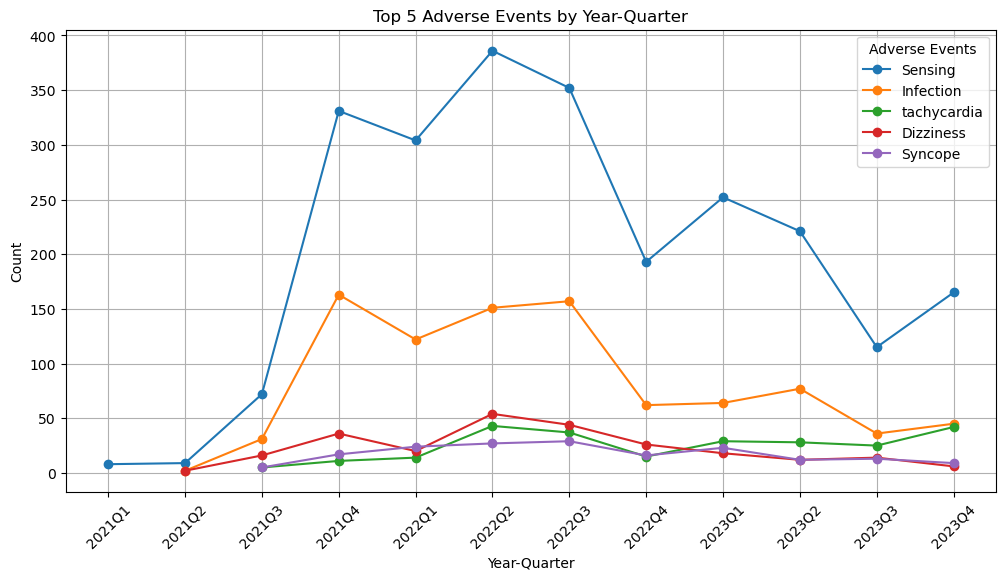

In [20]:
# Function to find adverse events in the text
def find_adverse_events(text):
    found_events = []
    for keyword in updated_adverse_event_keywords:
        if keyword.lower() in text.lower():
            found_events.append(keyword)
    return found_events

# Apply the function to find adverse events
df_latest['ADVERSE_EVENTS'] = df_latest['FOI_TEXT'].apply(find_adverse_events)

# Extract year and quarter from the DATE_RECEIVED column
df_latest['DATE_RECEIVED'] = pd.to_datetime(df_latest['DATE_RECEIVED'])
df_latest['Year'] = df_latest['DATE_RECEIVED'].dt.year
df_latest['Quarter'] = df_latest['DATE_RECEIVED'].dt.to_period('Q')

# Explode the 'ADVERSE_EVENTS' list to separate rows for each event
df_events = df_latest.explode('ADVERSE_EVENTS')

# Group by year and quarter to get counts for each adverse event
df_event_counts = df_events.groupby(['Year', 'Quarter', 'ADVERSE_EVENTS']).size().reset_index(name='Count')

# Get the top 10 adverse events
top_adverse_events = df_event_counts.groupby('ADVERSE_EVENTS')['Count'].sum().nlargest(10).index.tolist()

# Filter the data for the top 10 adverse events
df_top_events = df_event_counts[df_event_counts['ADVERSE_EVENTS'].isin(top_adverse_events)]

# Separate the top 10 into two groups for plotting
top_5_events = top_adverse_events[:5]
next_5_events = top_adverse_events[5:]

# Plot the top 5 adverse events
plt.figure(figsize=(12, 6))
for event in top_5_events:
    event_data = df_top_events[df_top_events['ADVERSE_EVENTS'] == event]
    plt.plot(event_data['Quarter'].astype(str), event_data['Count'], marker='o', label=event)

plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.title('Top 5 Adverse Events by Year-Quarter')
plt.legend(title='Adverse Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Count plot for next Top 5 Adverse Events

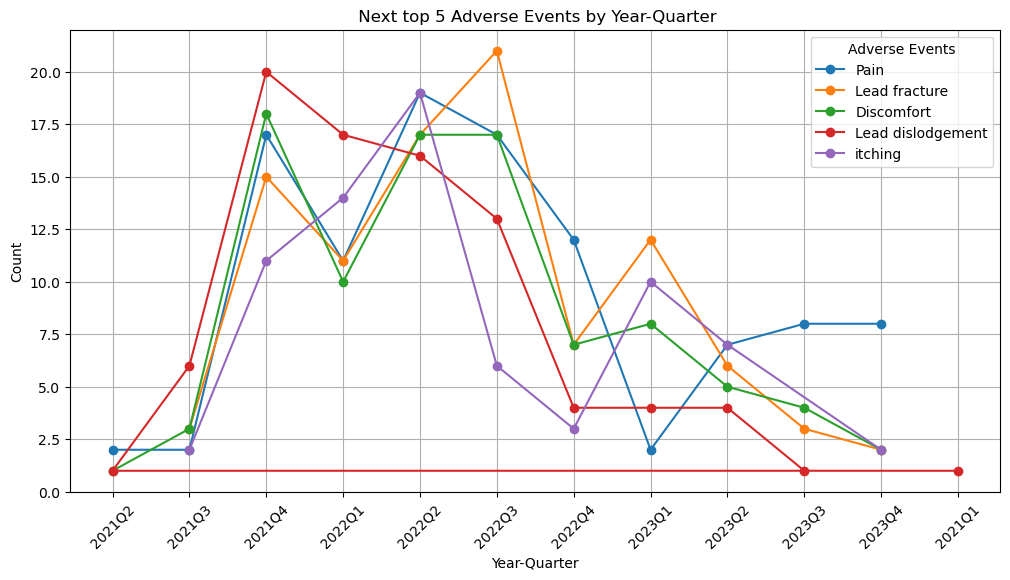

In [22]:
# Plot the next 5 adverse events
plt.figure(figsize=(12, 6))
for event in next_5_events:
    event_data = df_top_events[df_top_events['ADVERSE_EVENTS'] == event]
    plt.plot(event_data['Quarter'].astype(str), event_data['Count'], marker='o', label=event)

plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.title(' Next top 5 Adverse Events by Year-Quarter')
plt.legend(title='Adverse Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Proportion of Adverse Events

The proportion of the top 20 adverse events over different quarters and years. It first preprocesses the data by exploding the ADVERSE_EVENTS column, grouping it by year, quarter, and adverse events to calculate counts. The top 20 adverse events are identified based on their total occurrences across all periods. Proportions are calculated by normalizing event counts within each quarter to the total adverse events for that quarter. The top events are divided into four groups of five for visualization, with two separate figures plotting the proportions over time for each group. This provides insights into trends and variations in adverse events

/var/folders/_w/50yh5z1s1778kgs93qqg5yqw0000gn/T/ipykernel_70958/3993496595.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_events['Total_Quarter_Count'] = df_top_events.groupby(['Year', 'Quarter'])['Count'].transform('sum')
/var/folders/_w/50yh5z1s1778kgs93qqg5yqw0000gn/T/ipykernel_70958/3993496595.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_events['Proportion'] = df_top_events['Count'] / df_top_events['Total_Quarter_Count']


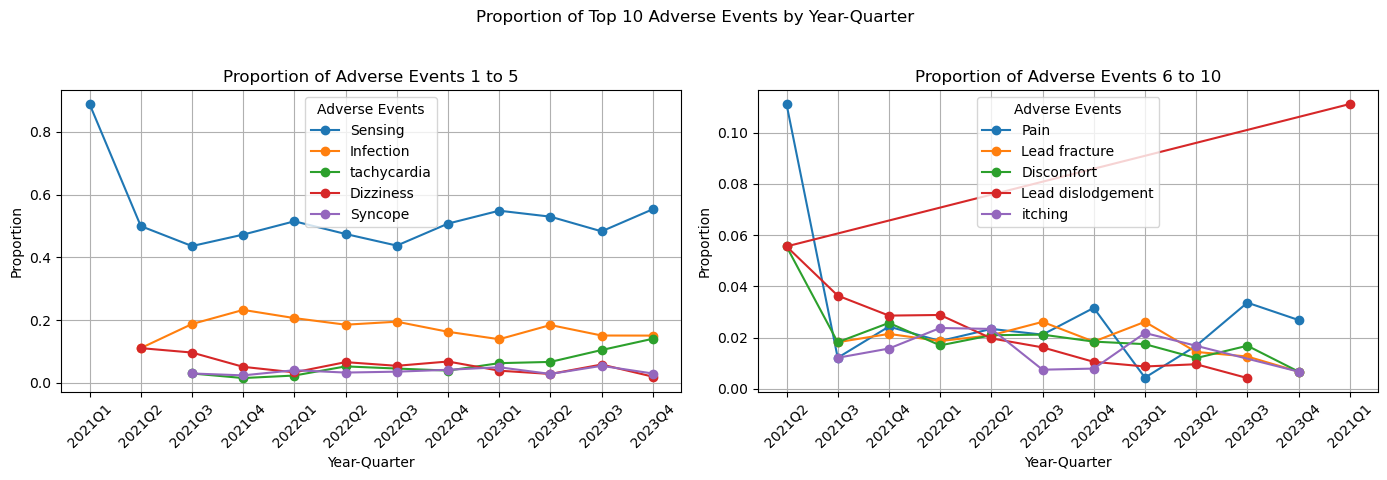

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 1: Explode 'ADVERSE_EVENTS' and group by year, quarter, and adverse event to get counts
df_latest['DATE_RECEIVED'] = pd.to_datetime(df_latest['DATE_RECEIVED'], errors='coerce')
df_latest['Year'] = df_latest['DATE_RECEIVED'].dt.year
df_latest['Quarter'] = df_latest['DATE_RECEIVED'].dt.to_period('Q')
df_events = df_latest.explode('ADVERSE_EVENTS')

# Step 2: Group by year, quarter, and adverse event, then count occurrences
df_event_counts = df_events.groupby(['Year', 'Quarter', 'ADVERSE_EVENTS']).size().reset_index(name='Count')

# Step 3: Identify the top 20 adverse events by total counts across all years and quarters
top_adverse_events = df_event_counts.groupby('ADVERSE_EVENTS')['Count'].sum().nlargest(20).index.tolist()
df_top_events = df_event_counts[df_event_counts['ADVERSE_EVENTS'].isin(top_adverse_events)]

# Step 4: Calculate total counts per quarter for normalization
df_top_events['Total_Quarter_Count'] = df_top_events.groupby(['Year', 'Quarter'])['Count'].transform('sum')
df_top_events['Proportion'] = df_top_events['Count'] / df_top_events['Total_Quarter_Count']

# Step 5: Divide the top 20 adverse events into four groups of five for plotting
grouped_events = [top_adverse_events[i:i + 5] for i in range(0, 20, 5)]

# Step 6: Plot the first two groups in the first figure
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))
fig1.suptitle('Proportion of Top 10 Adverse Events by Year-Quarter')

for i, ax in enumerate(axs1):
    group_events = grouped_events[i]
    for event in group_events:
        event_data = df_top_events[df_top_events['ADVERSE_EVENTS'] == event]
        ax.plot(event_data['Quarter'].astype(str), event_data['Proportion'], marker='o', label=event)
    ax.set_xlabel('Year-Quarter')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of Adverse Events {i * 5 + 1} to {(i + 1) * 5}')
    ax.legend(title='Adverse Events')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




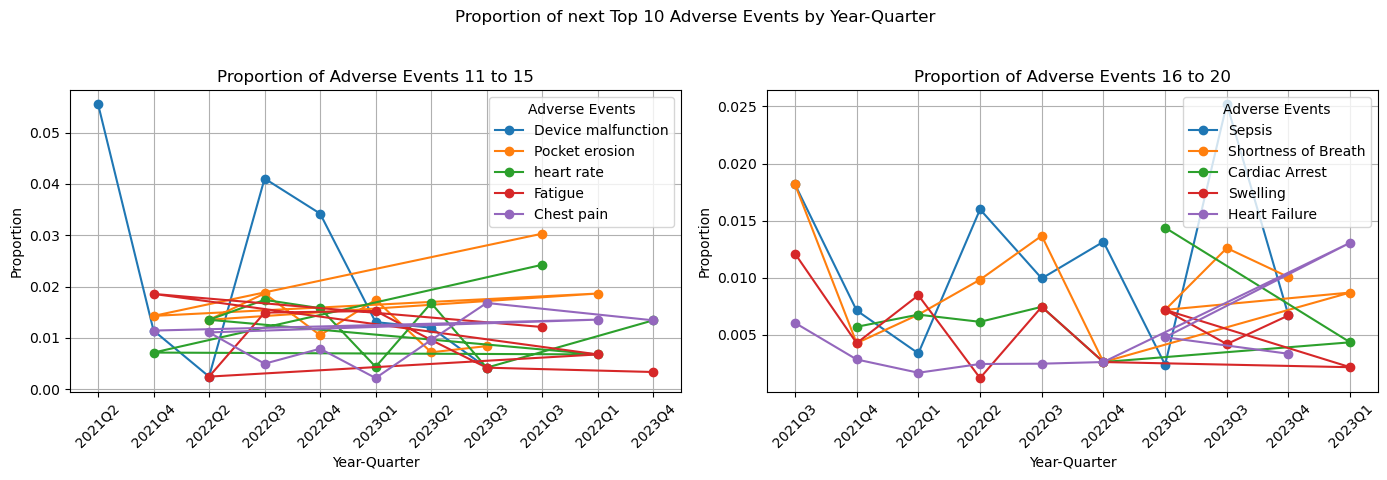

In [42]:
# Step 7: Plot the next two groups in the second figure
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 5))
fig2.suptitle('Proportion of next Top 10 Adverse Events by Year-Quarter')

for i, ax in enumerate(axs2):
    group_events = grouped_events[i + 2]  # Start from the third and fourth group
    for event in group_events:
        event_data = df_top_events[df_top_events['ADVERSE_EVENTS'] == event]
        ax.plot(event_data['Quarter'].astype(str), event_data['Proportion'], marker='o', label=event)
    ax.set_xlabel('Year-Quarter')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of Adverse Events {i * 5 + 11} to {(i + 1) * 5 + 10}')
    ax.legend(title='Adverse Events')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
